# Assignment 4: EE708
## Dhruv Gupta, 240354

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category='FutureWarning')
plt.style.use("ggplot")

#sklearn decision tree regressor model
from sklearn.tree import DecisionTreeRegressor, plot_tree
#sklearn decision tree regressor model
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Problem 7
Write a code to obtain a fully grown regression tree for the data given in Q2 and
visualize the regression tree.


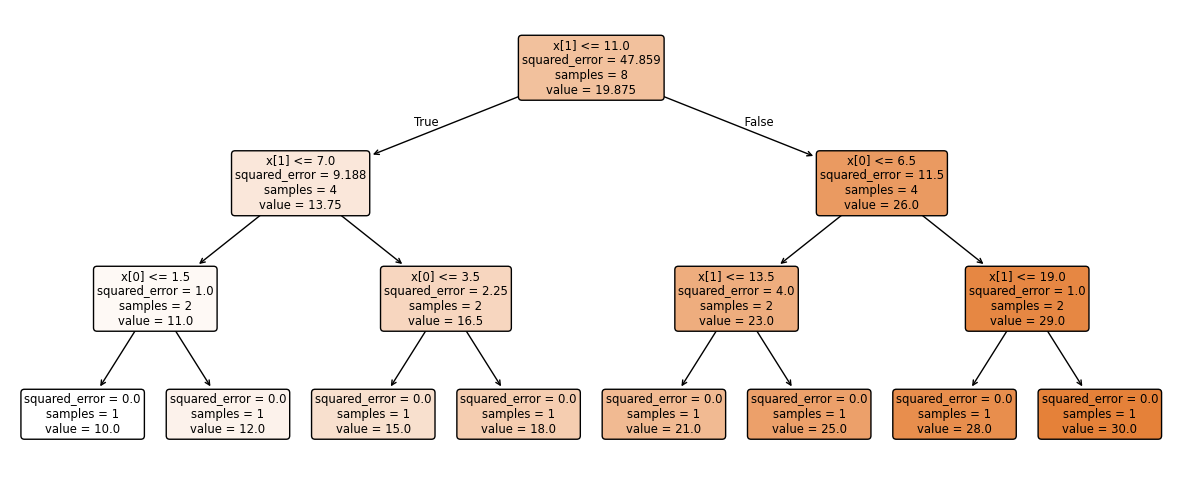

In [45]:
df = pd.DataFrame({
    "x1" : list(np.arange(1,9)),
    "x2" : [5,6,8,10,12,15,18,20],
    "y" : [10,12,15,18,21,25,28,30]
})


X = df[['x1', 'x2']].values
y = df['y'].values


#decision tree regression
reg_tree = DecisionTreeRegressor(max_depth=None)
reg_tree.fit(X,y)

plt.figure(figsize=(15,6))
plot_tree(reg_tree, filled=True, rounded=True)
plt.show()

## Problem 8
Binary classification tree:\
a. Train a fully grown binary classification tree based on Gini impurity using the dataset
A4_train.csv and visualize it.\
b. Compute the Sum of Squared Errors (SSE) on the test dataset (A4_test.csv) at each depth and
plot the variation of SSE with depth.\
c. Determine the optimal pruning depth by selecting the depth where SSE change is minimal.\
d. Visualize the pruned tree.

### Part a

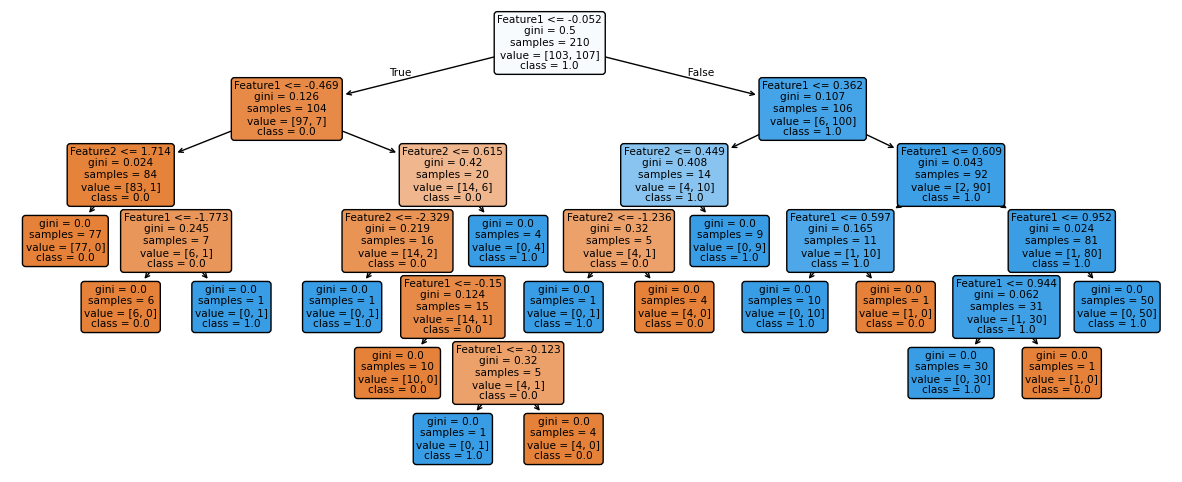

In [39]:
df_train = pd.read_csv("A4_train.csv")
df_test  = pd.read_csv("A4_test.csv")

X_train = df_train.drop(columns='Label')
y_train = df_train['Label']

X_test = df_test.drop(columns='Label')
y_test = df_test['Label']

classifier = DecisionTreeClassifier(max_depth=None, criterion='gini')
classifier.fit(X_train, y_train)

plt.figure(figsize=(15,6))
plot_tree(classifier, feature_names=X_train.columns, class_names=classifier.classes_.astype(str), filled=True, rounded=True)
plt.show()


### Part b

In [40]:
max_depth = classifier.get_depth()
max_depth

6

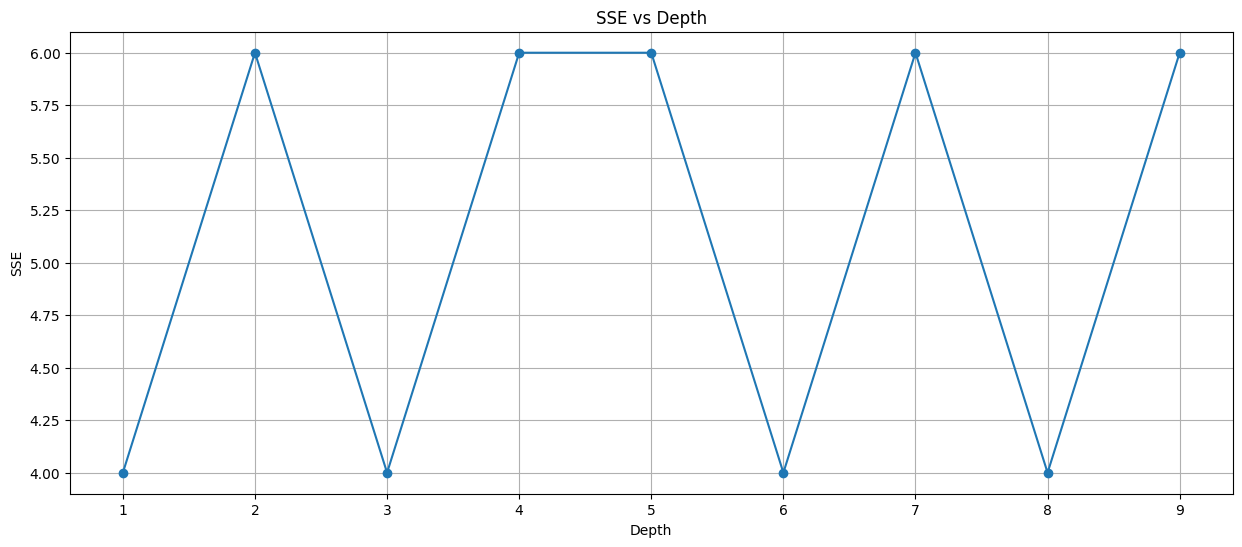

In [41]:
sses = []

for depth in range(1,10):
  model = DecisionTreeClassifier(max_depth = max_depth, criterion='gini')
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  sse = 0
  for i in range(len(y_pred)):
    sse += (y_pred[i] - y_test[i])**2
  sses.append(sse)

plt.figure(figsize=(15, 6))
plt.plot(list(np.arange(1,10)), sses, marker='o')
plt.xlabel('Depth')
plt.ylabel('SSE')
plt.title('SSE vs Depth')
plt.grid(True)
plt.show()



### Part c and Part d

In [42]:
sse_diff = np.diff(sses)
depths = list(np.arange(1,10))
# Find depth where SSE change is minimal
optimal_depth_idx = np.argmin(np.abs(sse_diff))
optimal_depth = depths[optimal_depth_idx + 1]

print(f"Optimal Pruning Depth: {optimal_depth}")


Optimal Pruning Depth: 5


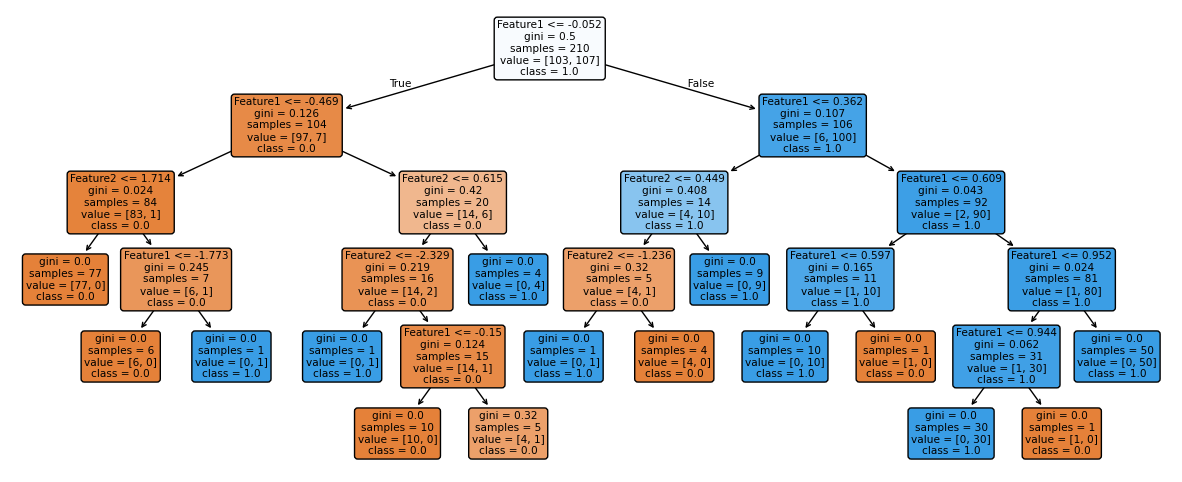

In [44]:
pruned_tree = DecisionTreeClassifier(max_depth = optimal_depth, criterion='gini')
pruned_tree.fit(X_train, y_train)


plt.figure(figsize=(15,6))
plot_tree(pruned_tree, feature_names=X_train.columns, class_names=classifier.classes_.astype(str), filled=True, rounded=True)
plt.show()